In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
df_edge = pd.read_csv('twitch\ES\musae_ES_edges.csv')
df_target = pd.read_csv('twitch\ES\musae_ES_target.csv')

In [4]:
df_target = df_target[df_target.partner.eq(True)]

In [5]:
#Caricamento del grafo orientato
nodes = df_target['new_id'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [6]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [7]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  395
EDGES:  5207
DENSITY:  0.033
CLUSTERING:  0.17187432636130953


In [60]:
nx.clustering(graph)

{4: 0.35,
 963: 0.1592442645074224,
 1264: 0.07142857142857142,
 596: 0.09544513457556936,
 4397: 0.10154905335628227,
 793: 0.26461538461538464,
 5: 0.3333333333333333,
 570: 0.1111111111111111,
 2348: 0.15,
 4001: 0.13086770981507823,
 111: 0.15010570824524314,
 3915: 0.2857142857142857,
 1604: 0.16071428571428573,
 12: 0.10751104565537556,
 43: 0.24456521739130435,
 3436: 0.19538461538461538,
 2306: 0.12772133526850507,
 2015: 0.21578947368421053,
 2318: 0.11567164179104478,
 2468: 0.17127496159754224,
 1970: 0.18160919540229886,
 3072: 0.15679925994449584,
 3758: 0.20665322580645162,
 904: 0.21875,
 2283: 0.13688524590163934,
 636: 0.20738636363636365,
 1444: 0.1686046511627907,
 1750: 0.10401002506265664,
 784: 0.16287878787878787,
 2388: 0.1272072072072072,
 1455: 0.13341346153846154,
 2285: 0.1523809523809524,
 4078: 0.14285714285714285,
 4331: 0.152250146113384,
 656: 0.20487264673311184,
 2922: 0.1259600614439324,
 4491: 0.23636363636363636,
 3271: 0.17166666666666666,
 670: 0

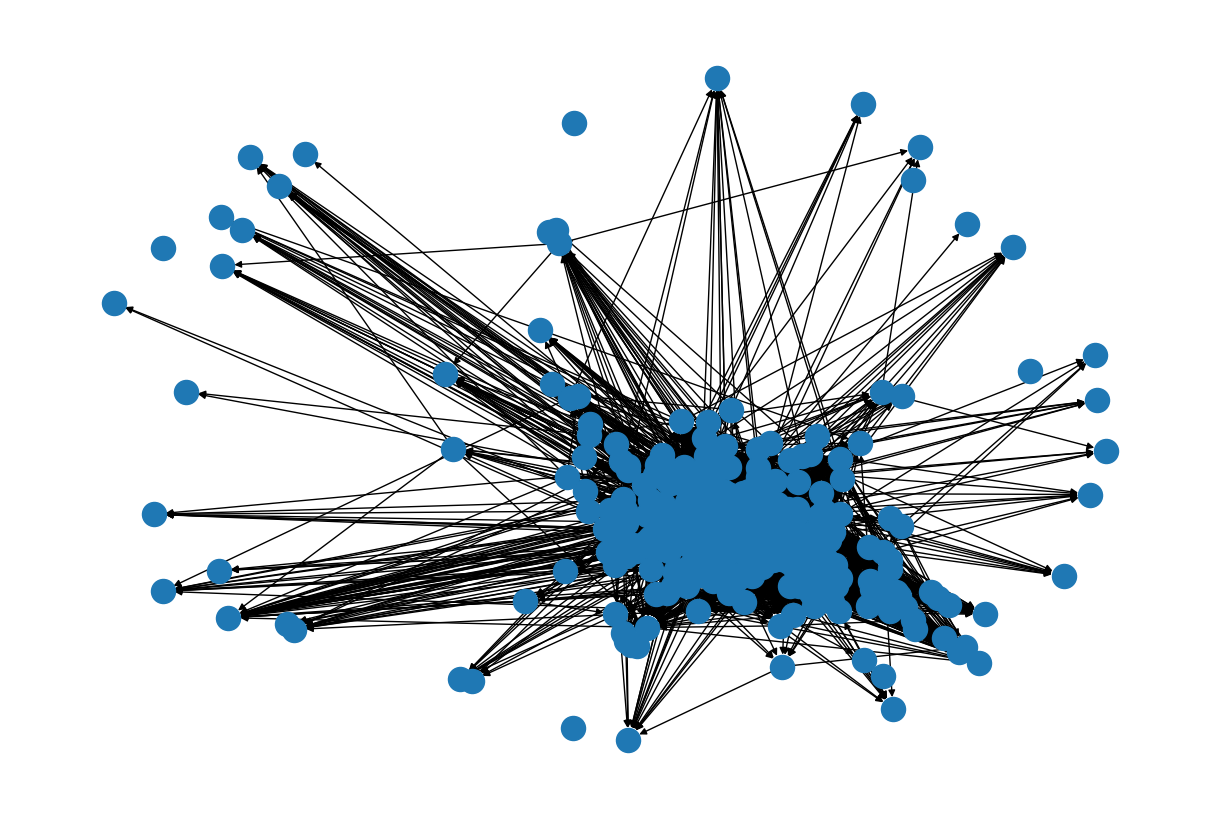

In [61]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

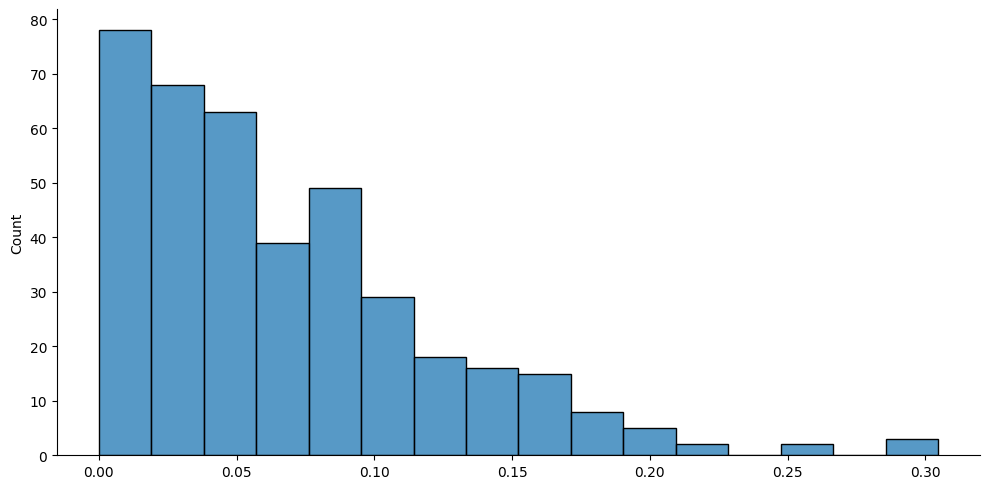

In [8]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

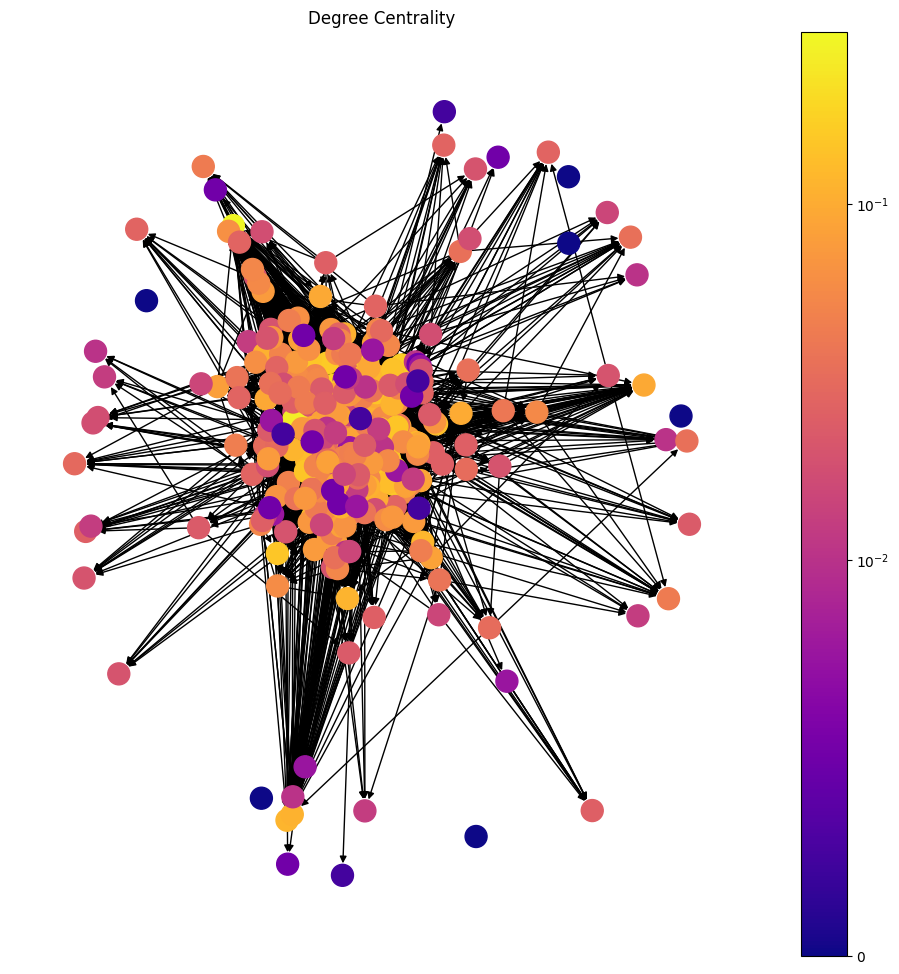

In [63]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

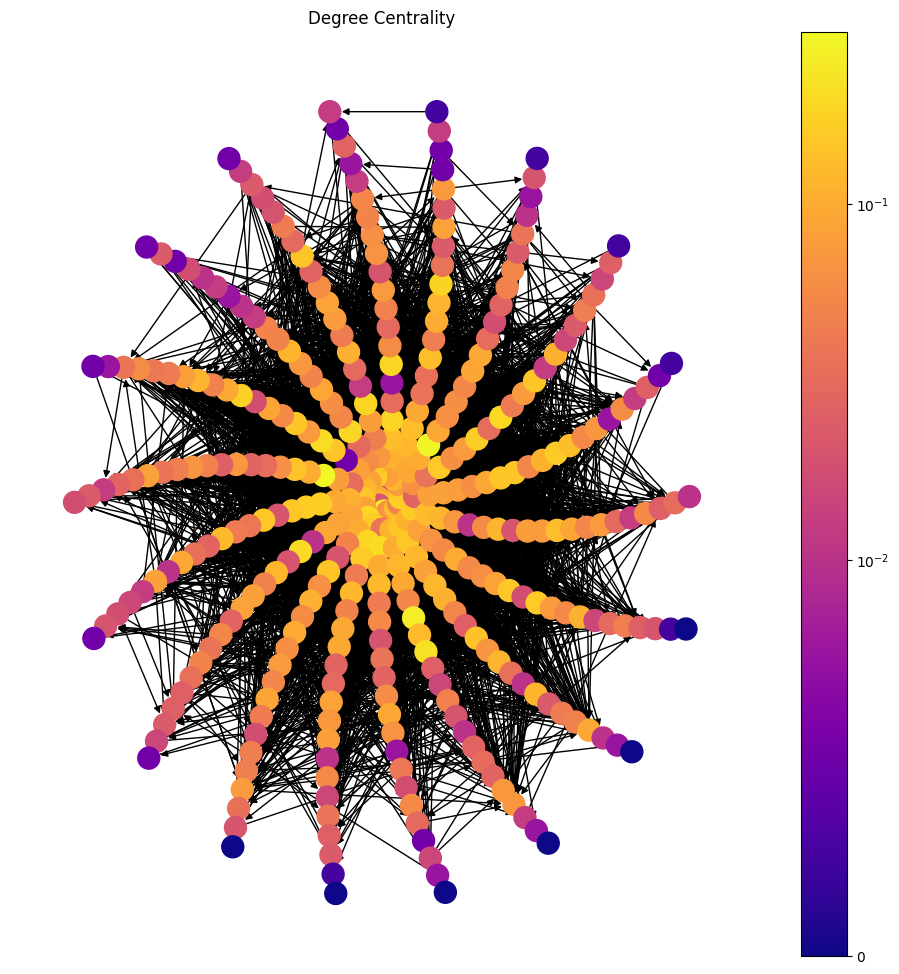

In [64]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

<AxesSubplot:>

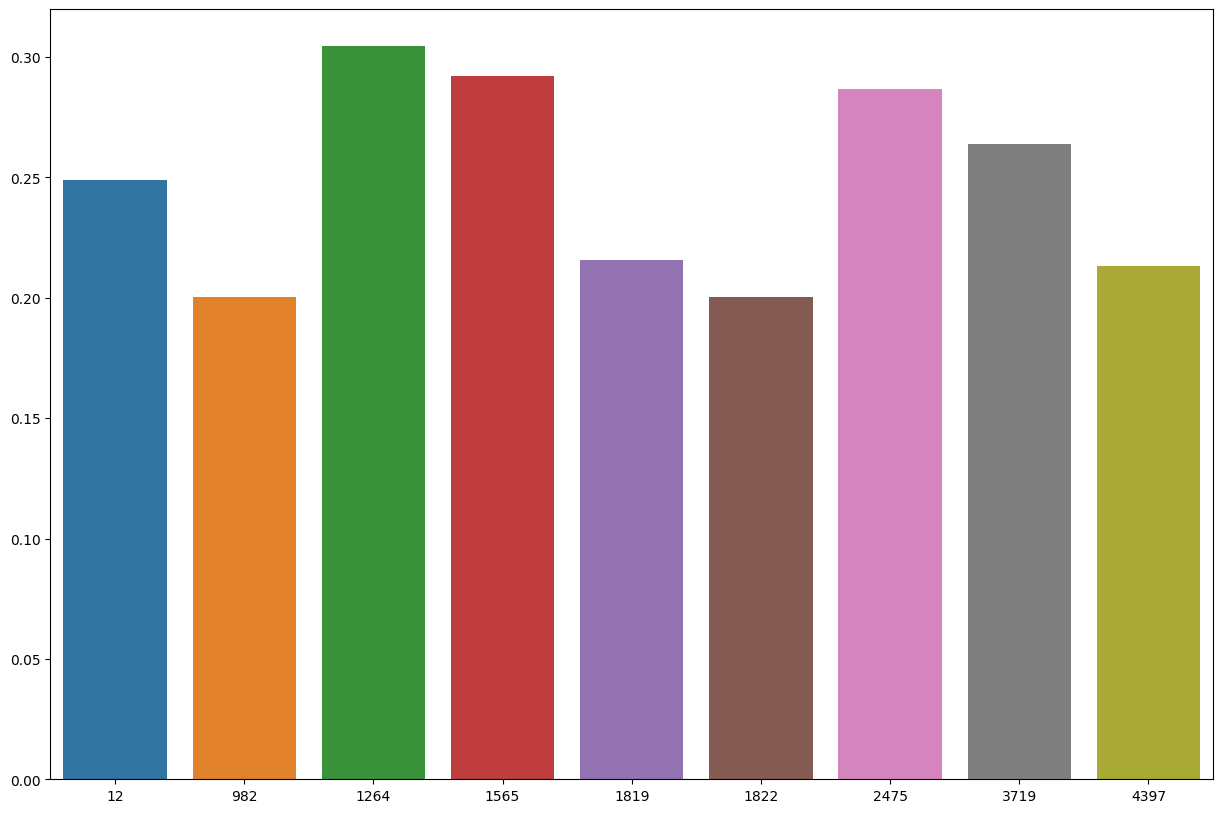

In [76]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

{1264: Text(-0.00015377254324231205, -0.0835936905640562, '1264'),
 4397: Text(0.01936143216217004, 0.3406677812808189, '4397'),
 12: Text(-0.02576422238197219, 0.07892442576210941, '12'),
 1822: Text(-0.013629170050730437, 0.07919781592336984, '1822'),
 2475: Text(0.0361585653866258, -0.048950204022099285, '2475'),
 1565: Text(-0.12780484089870137, 0.5732234030943167, '1565'),
 982: Text(-0.05031693581532568, 0.032443423369257006, '982'),
 3719: Text(-0.041079142442039474, -0.1477520966510517, '3719'),
 1819: Text(0.0032276524474392247, -0.008736791115109886, '1819')}

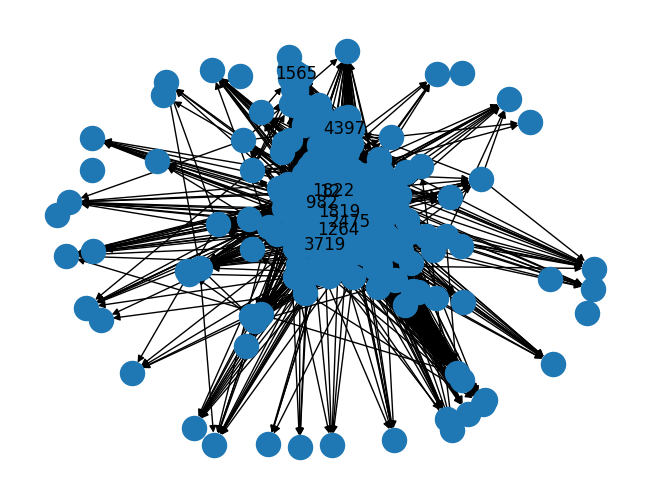

In [9]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

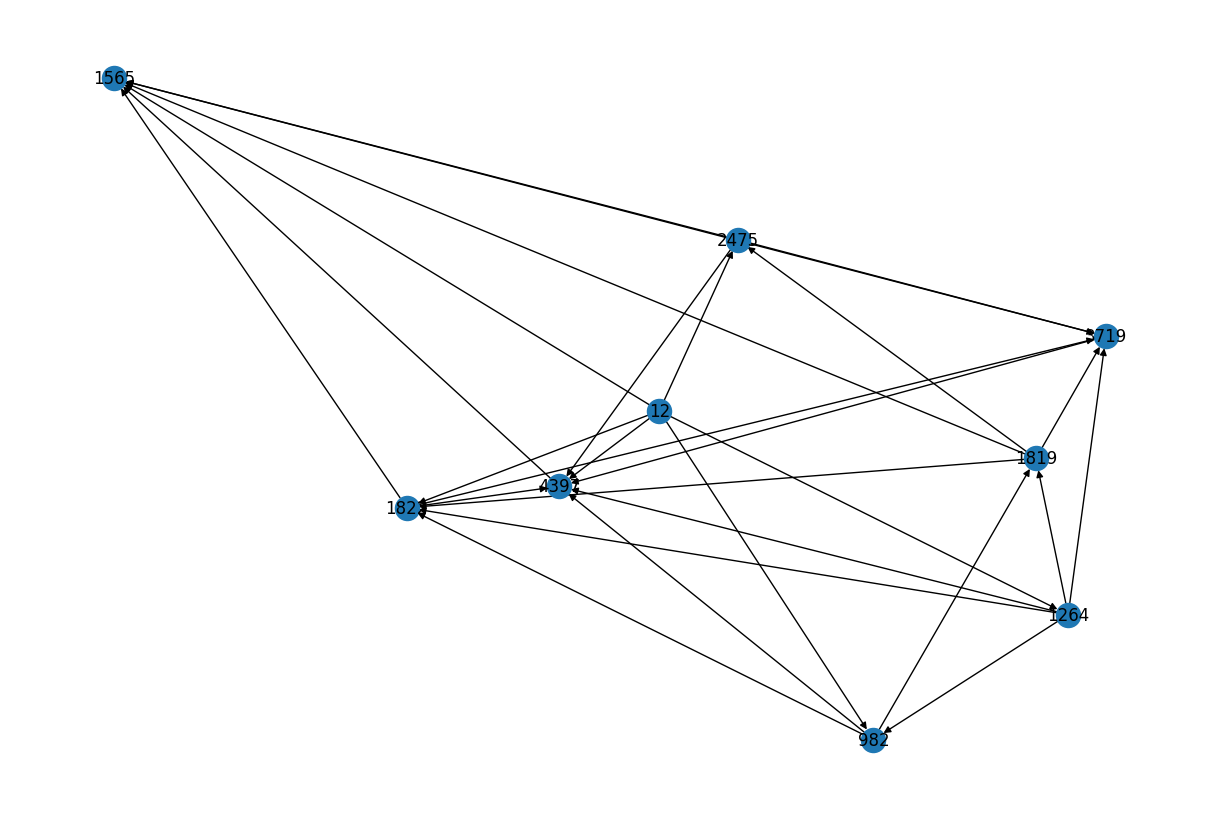

In [10]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_deg = nx.DiGraph()
graph_deg.add_edges_from(edges)
graph_deg.add_nodes_from(nodes)
pos_deg = nx.spring_layout(graph_deg)

plt.figure(figsize=(12,8))
nx.draw(graph_deg, pos_deg, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_deg, pos_deg, labels)
plt.show()

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

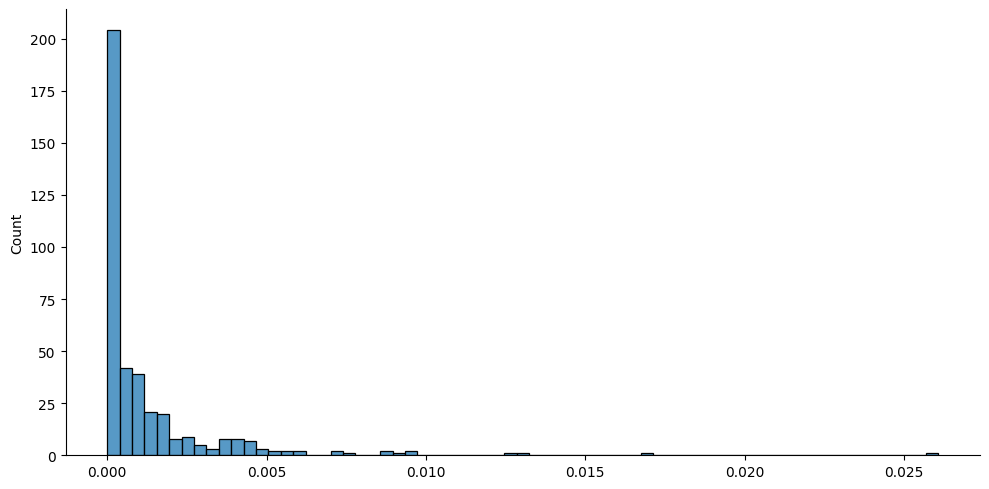

In [11]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

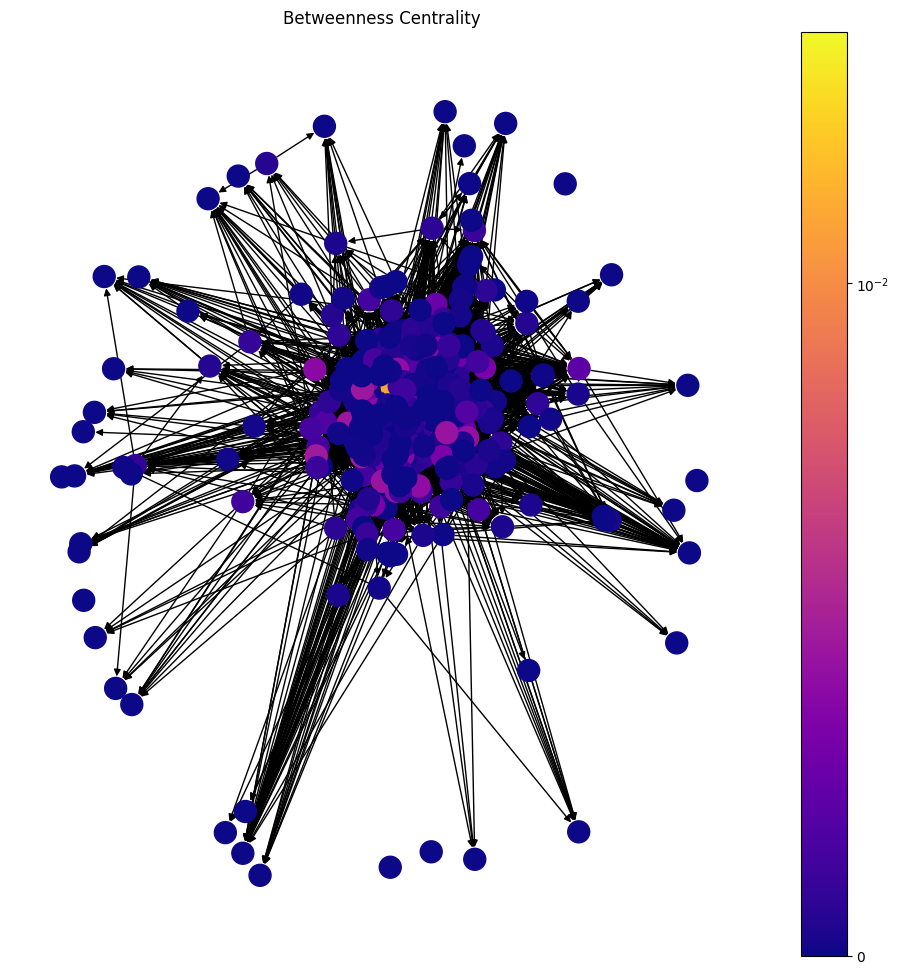

In [78]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

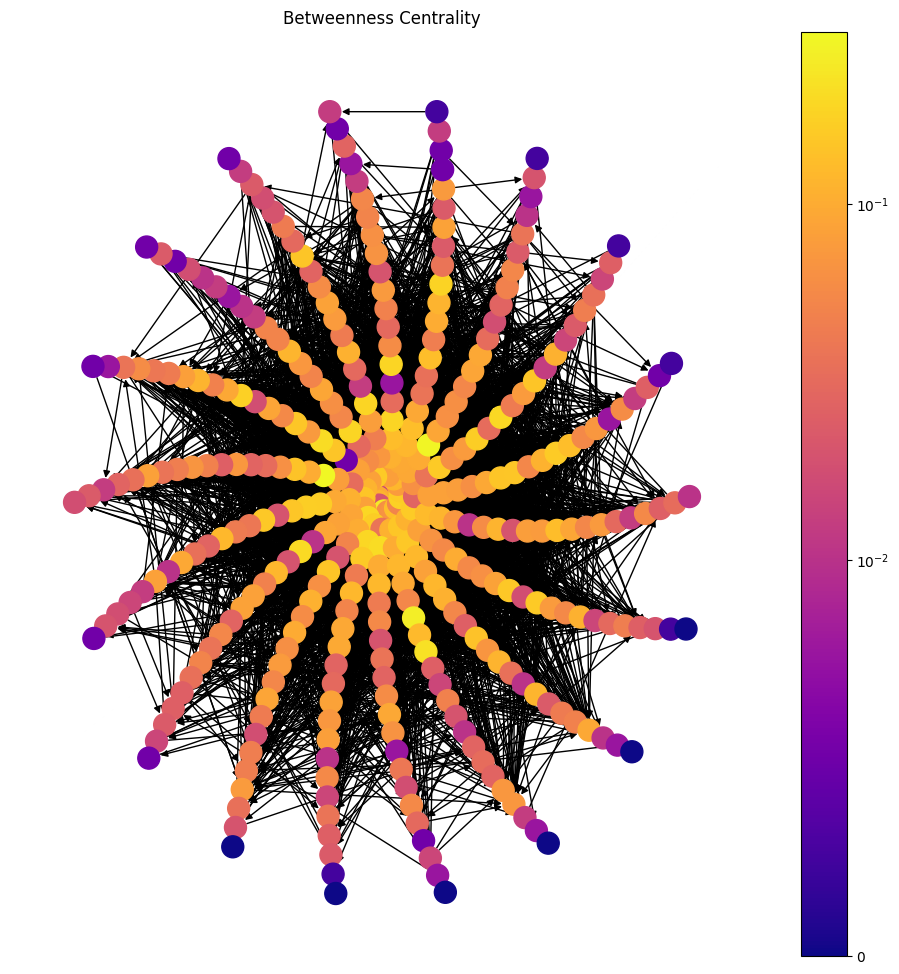

In [113]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{1264: Text(0.007307374935699517, -0.06925715218581999, '1264'),
 2388: Text(0.08716146609821582, 0.01231815715358071, '2388'),
 1455: Text(0.016785520587220045, -0.027241708241432957, '1455'),
 1397: Text(-0.08834614843044461, 0.015068797266647081, '1397'),
 1822: Text(0.04425344519825595, 0.07601325173694112, '1822'),
 2475: Text(-0.008538245596940181, -0.0730102657114883, '2475'),
 982: Text(0.03732585775482976, -0.032538616033794994, '982'),
 3719: Text(0.03997462458852677, 0.012054009046891245, '3719'),
 1819: Text(0.12866884996058597, 0.04561182026295609, '1819')}

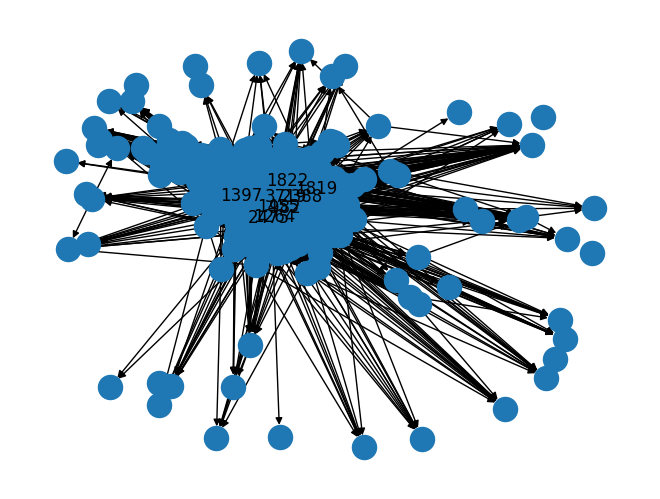

In [12]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.008: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

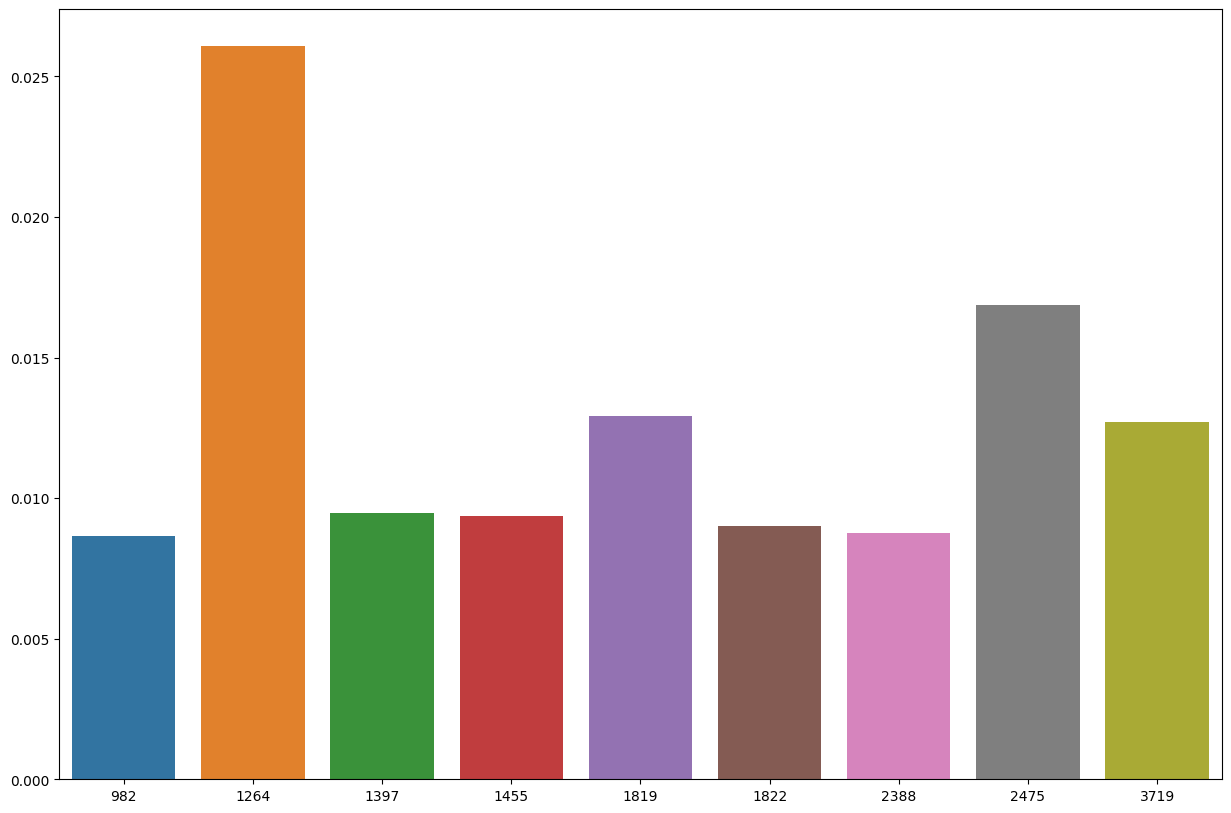

In [85]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in bet.items():
    if value > 0.008: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

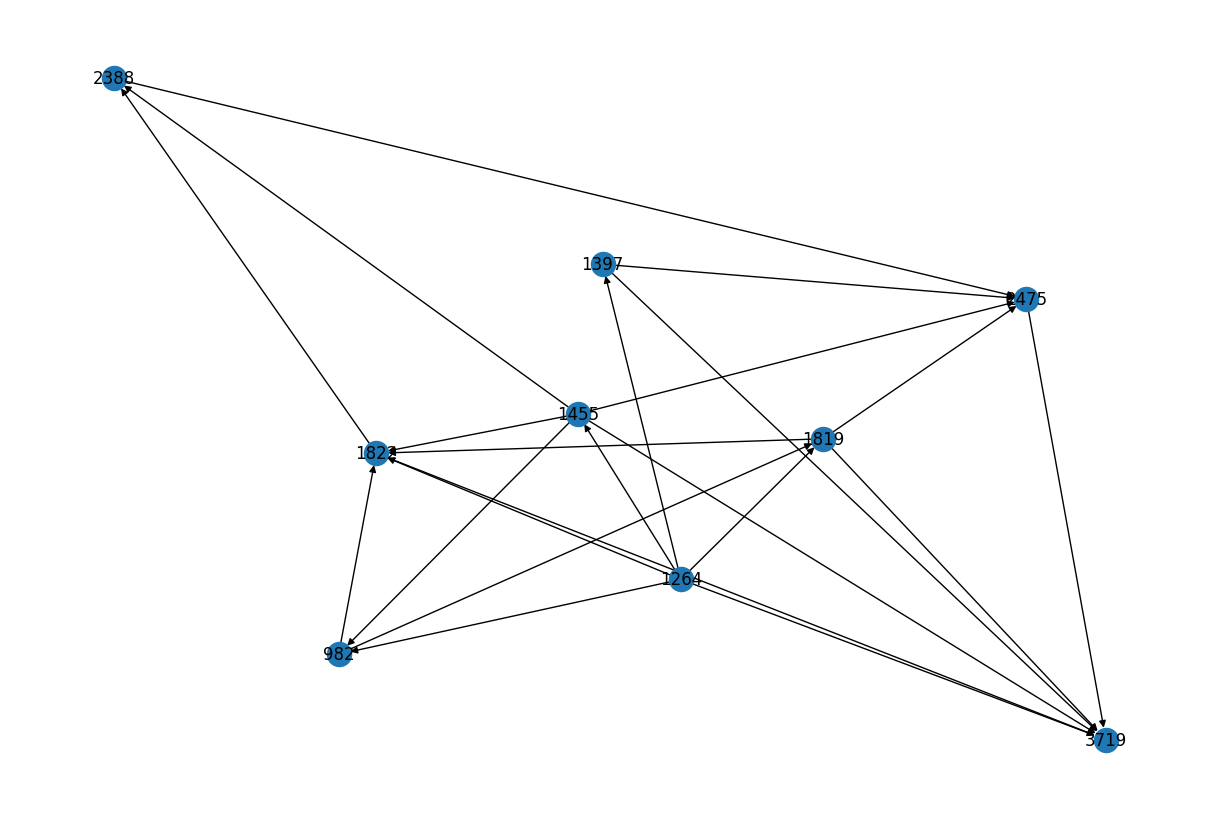

In [13]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_bet = nx.DiGraph()
graph_bet.add_edges_from(edges)
graph_bet.add_nodes_from(nodes)
pos_bet = nx.spring_layout(graph_bet)

plt.figure(figsize=(12,8))
nx.draw(graph_bet, pos_bet, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_bet, pos_bet, labels)
plt.show()

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

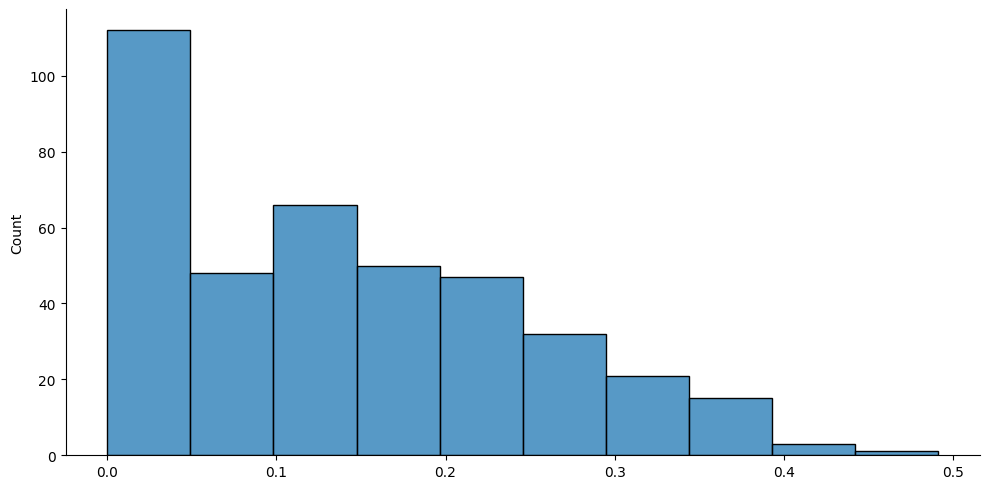

In [14]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

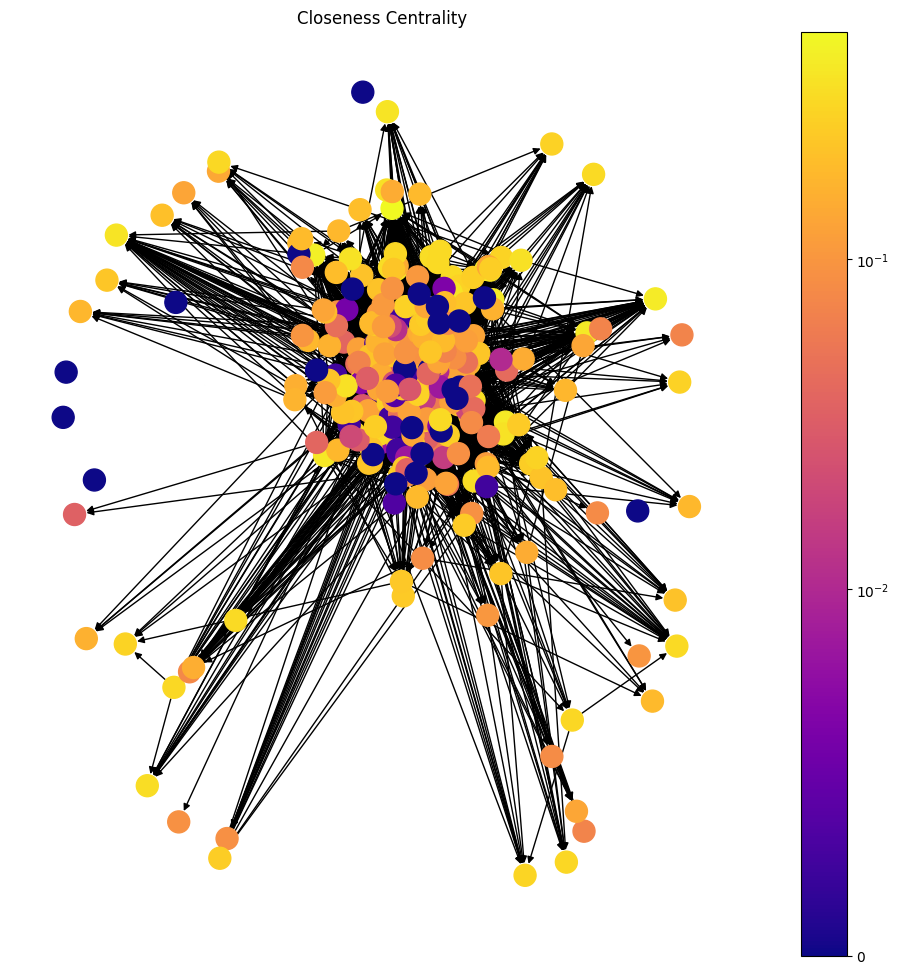

In [87]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

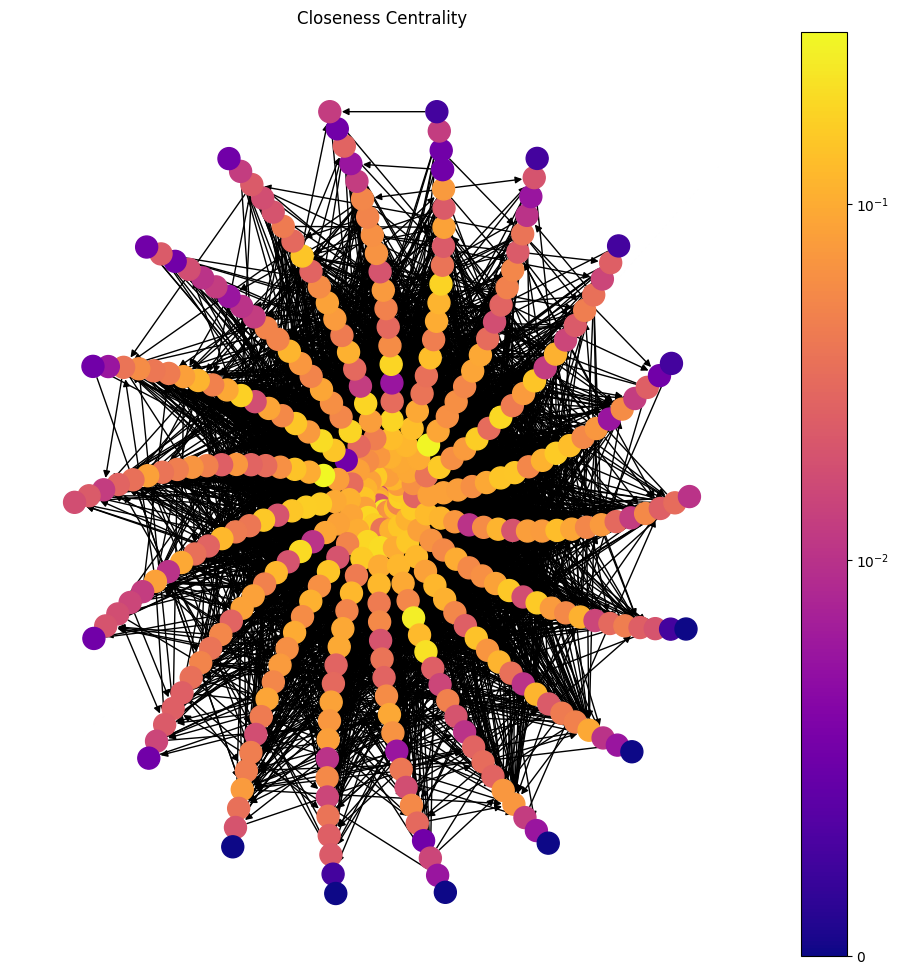

In [115]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{4397: Text(0.042094425570133695, -0.3478387038087348, '4397'),
 4331: Text(-0.06754149168184621, 0.1669338509257422, '4331'),
 4208: Text(-0.14552119041333778, 0.14961968522976637, '4208'),
 1376: Text(-0.15276273326533563, -0.19189574780515944, '1376'),
 1565: Text(-0.03574084366742159, -0.5248470092763446, '1565'),
 3719: Text(0.08165947175439624, 0.09092822458599052, '3719'),
 3921: Text(-0.16374698664680676, 0.8434745028449978, '3921'),
 940: Text(-0.13969970113300006, 0.7531280258693053, '940'),
 4151: Text(0.14732177897215173, -0.08137258141723877, '4151')}

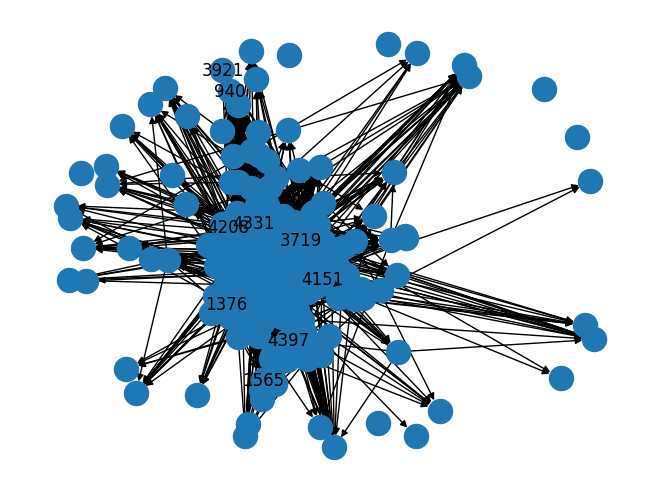

In [16]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.37: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

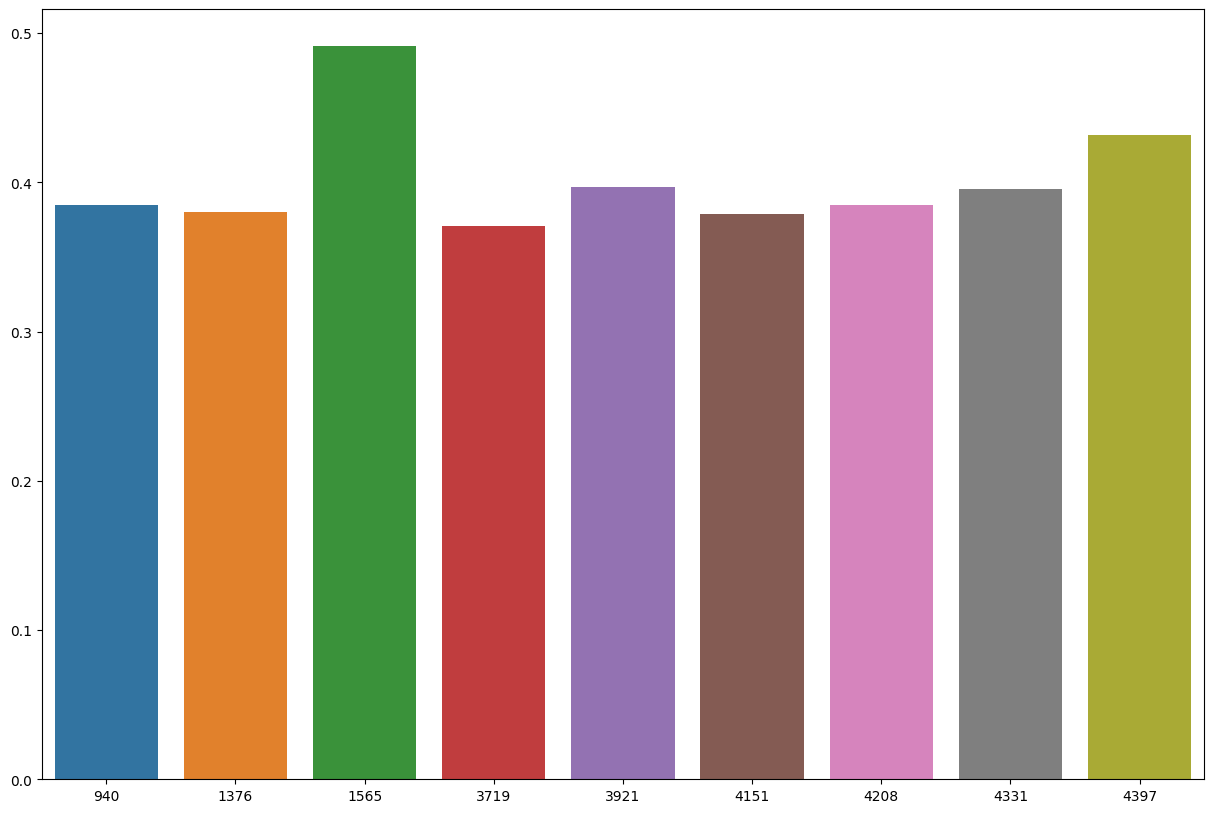

In [17]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in clos.items():
    if value > 0.37: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

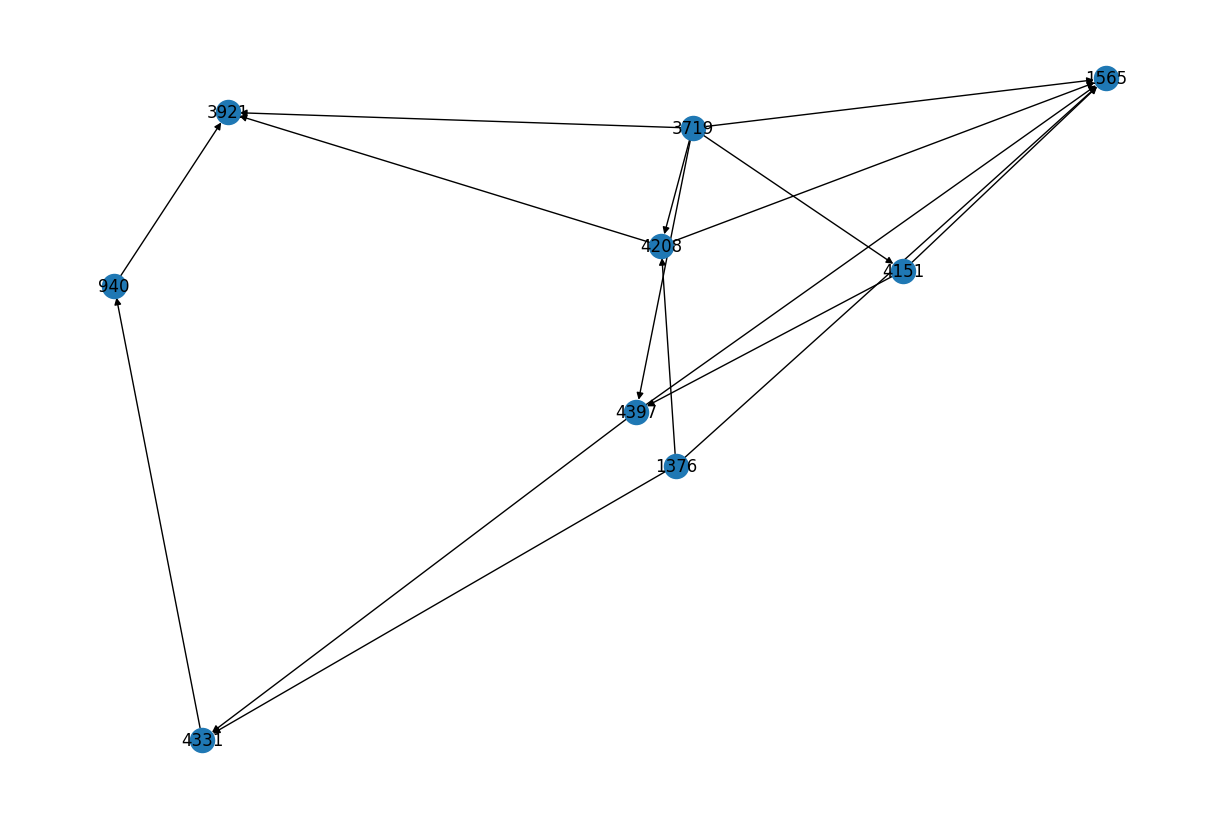

In [18]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_clos = nx.DiGraph()
graph_clos.add_edges_from(edges)
graph_clos.add_nodes_from(nodes)
pos_clos = nx.spring_layout(graph_clos)

plt.figure(figsize=(12,8))
nx.draw(graph_clos, pos_clos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_clos, pos_clos, labels)
plt.show()

Eigenvector Centrality

C:\Users\simod\AppData\Local\Temp\ipykernel_11944\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

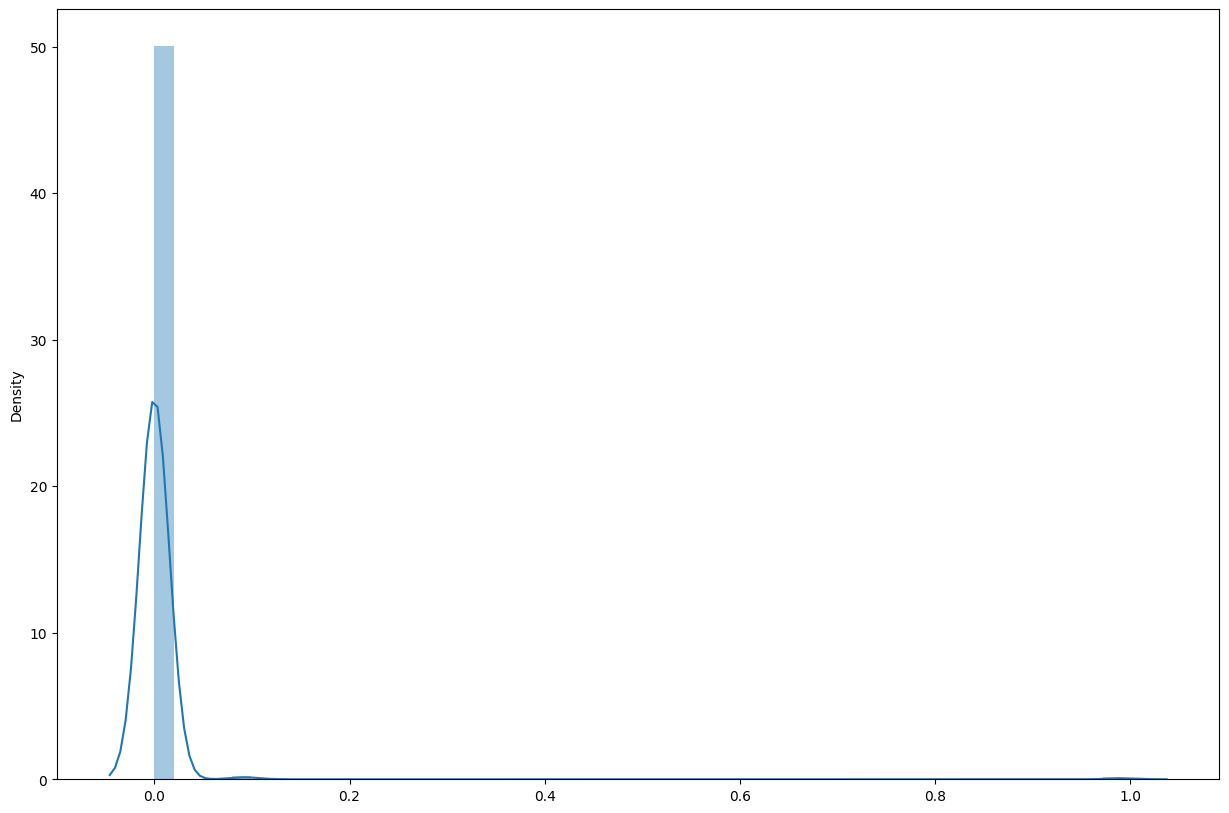

In [19]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

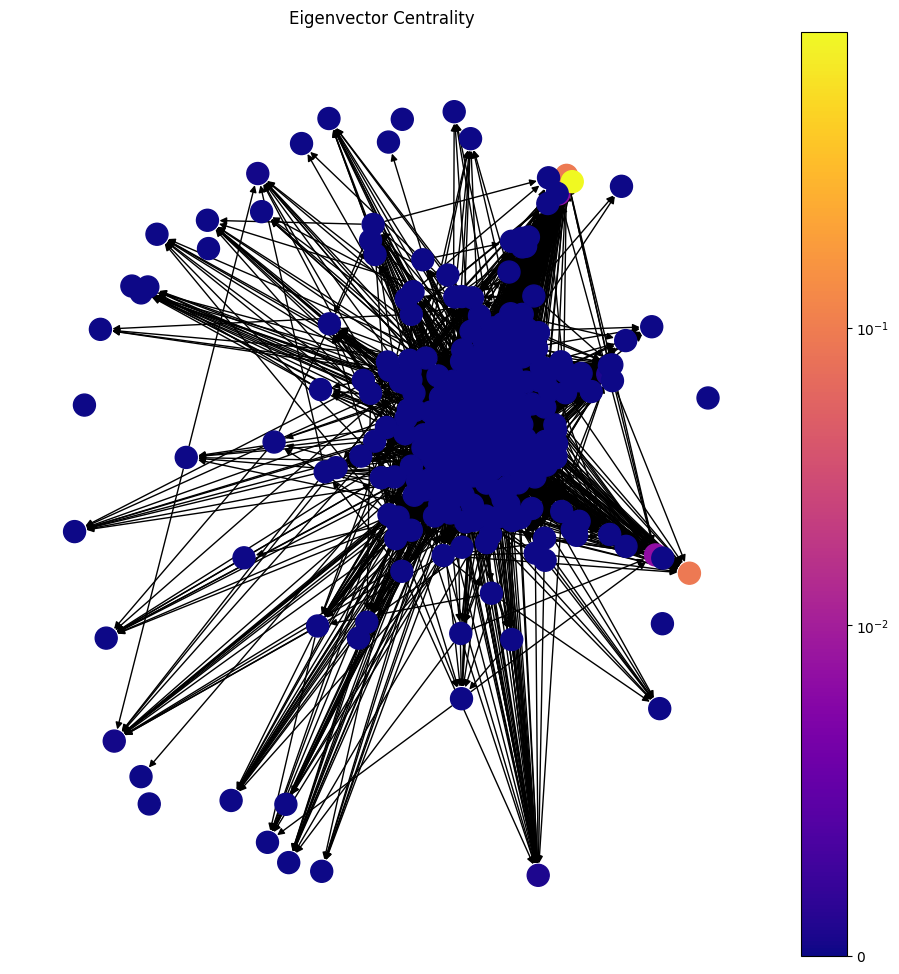

In [107]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

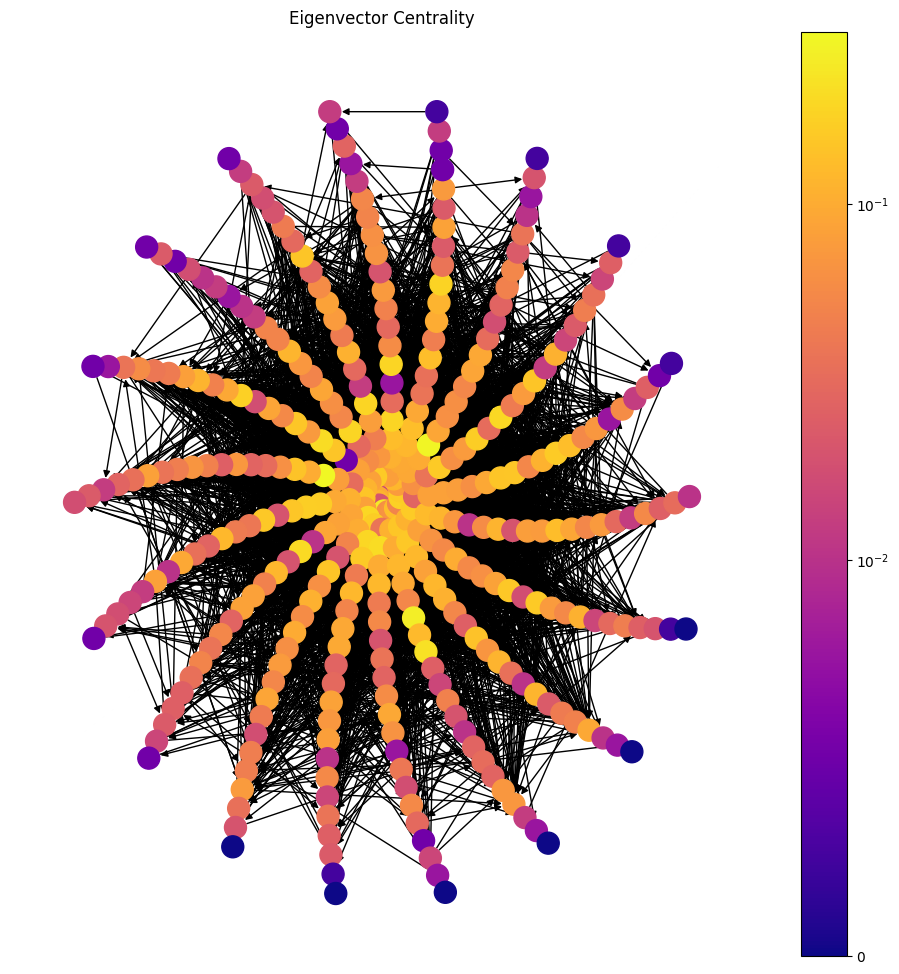

In [109]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{1565: Text(0.3134169964061414, 0.5305590629301975, '1565'),
 3252: Text(0.40408583092301914, 0.6863514104258798, '3252'),
 3921: Text(-0.7121432931671495, -0.7463439204551029, '3921')}

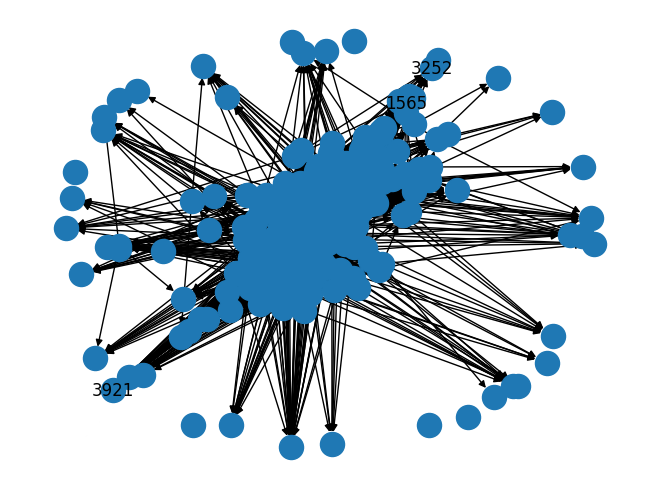

In [20]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

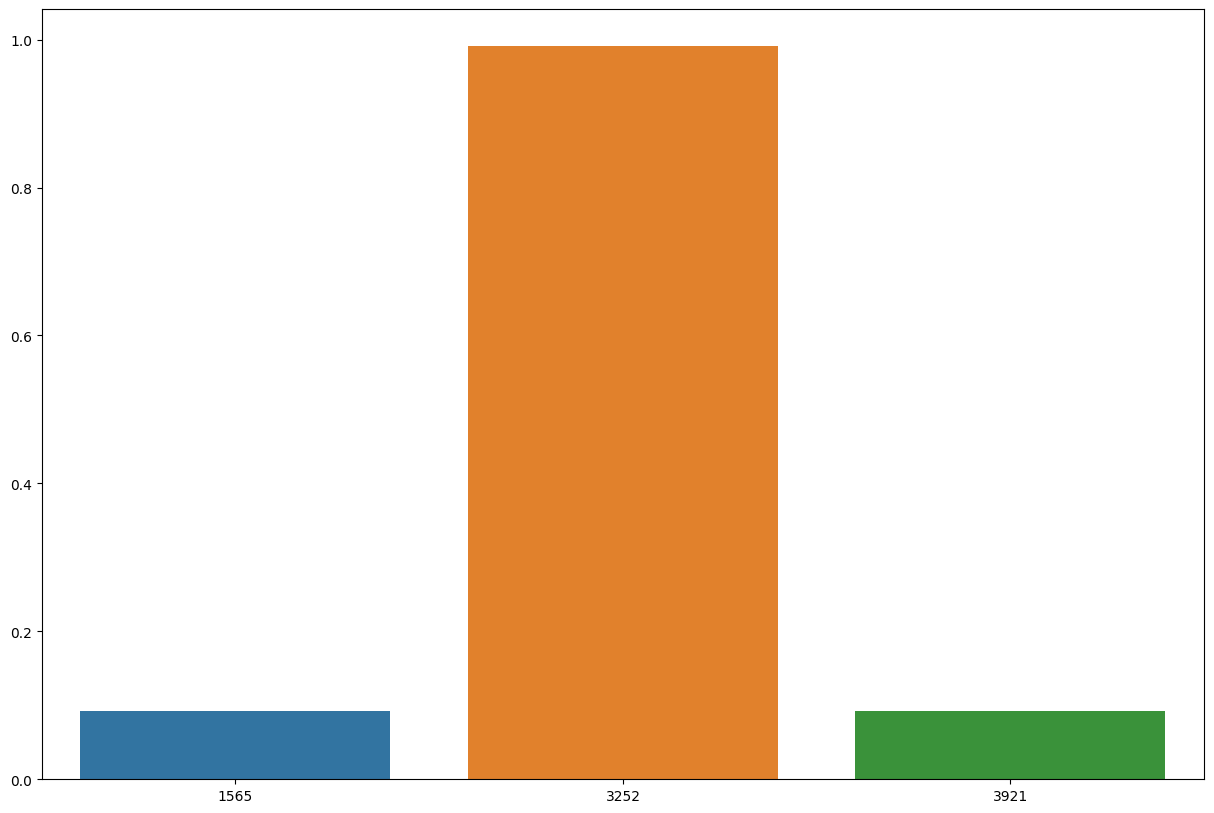

In [120]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

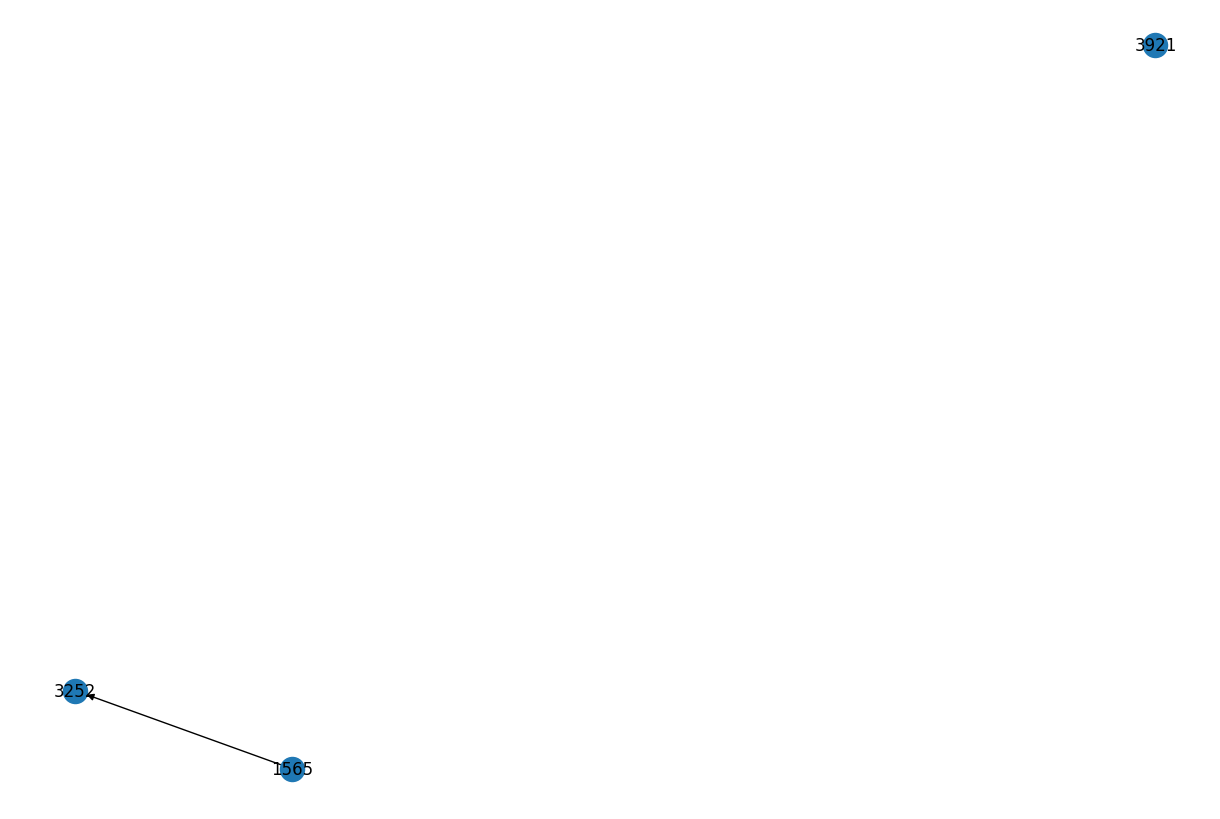

In [21]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_eigv = nx.DiGraph()
graph_eigv.add_edges_from(edges)
graph_eigv.add_nodes_from(nodes)
pos_eigv = nx.spring_layout(graph_eigv)

plt.figure(figsize=(12,8))
nx.draw(graph_eigv, pos_eigv, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_eigv, pos_eigv, labels)
plt.show()

PageRank

<Figure size 1500x1000 with 0 Axes>

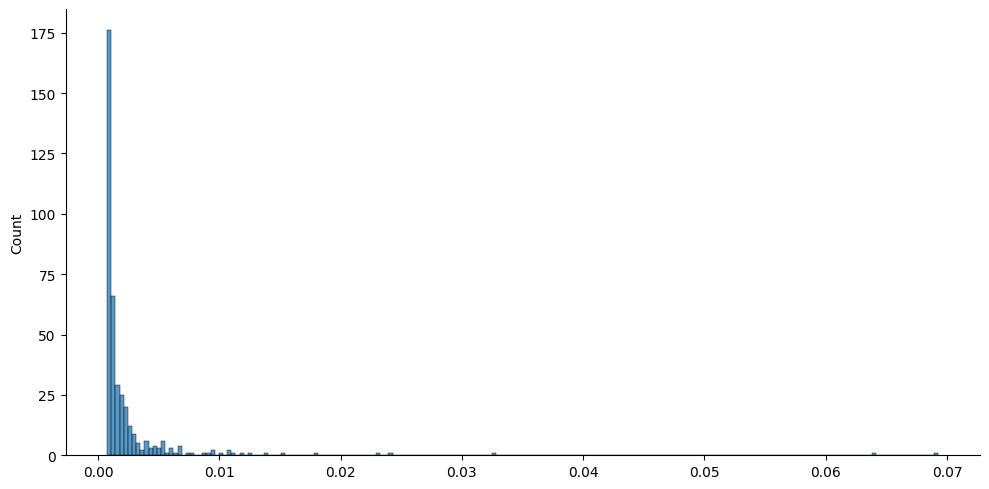

In [22]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

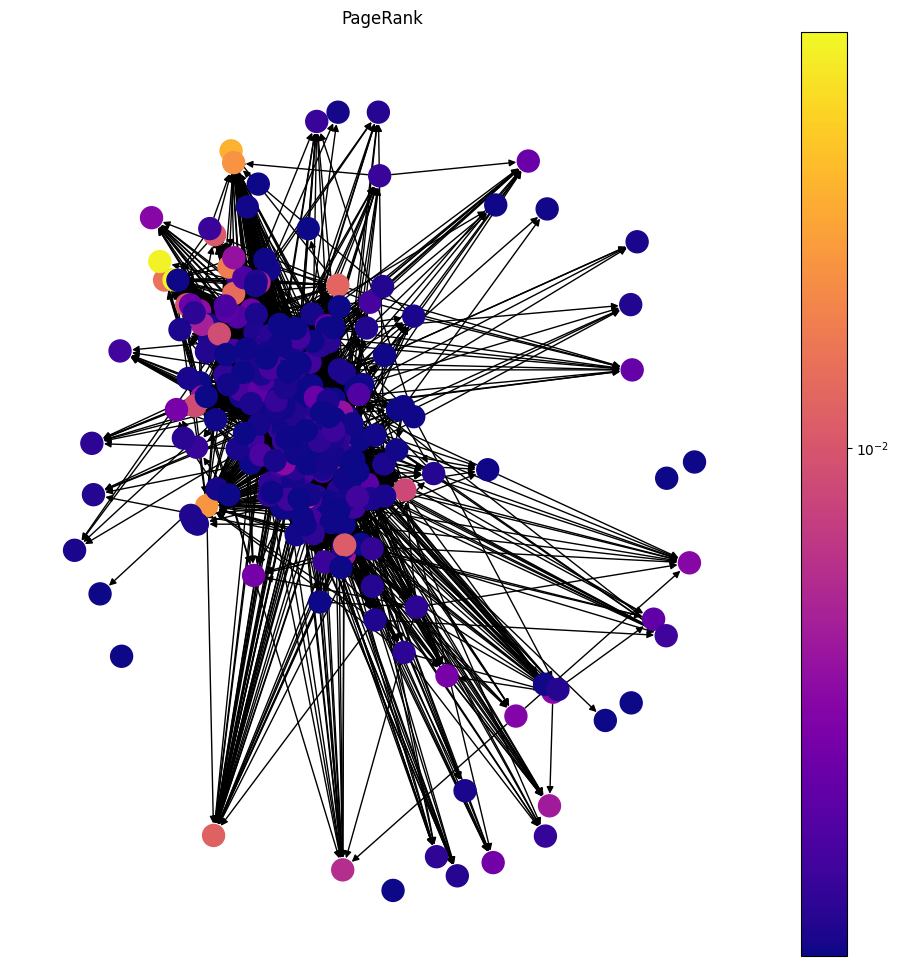

In [99]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

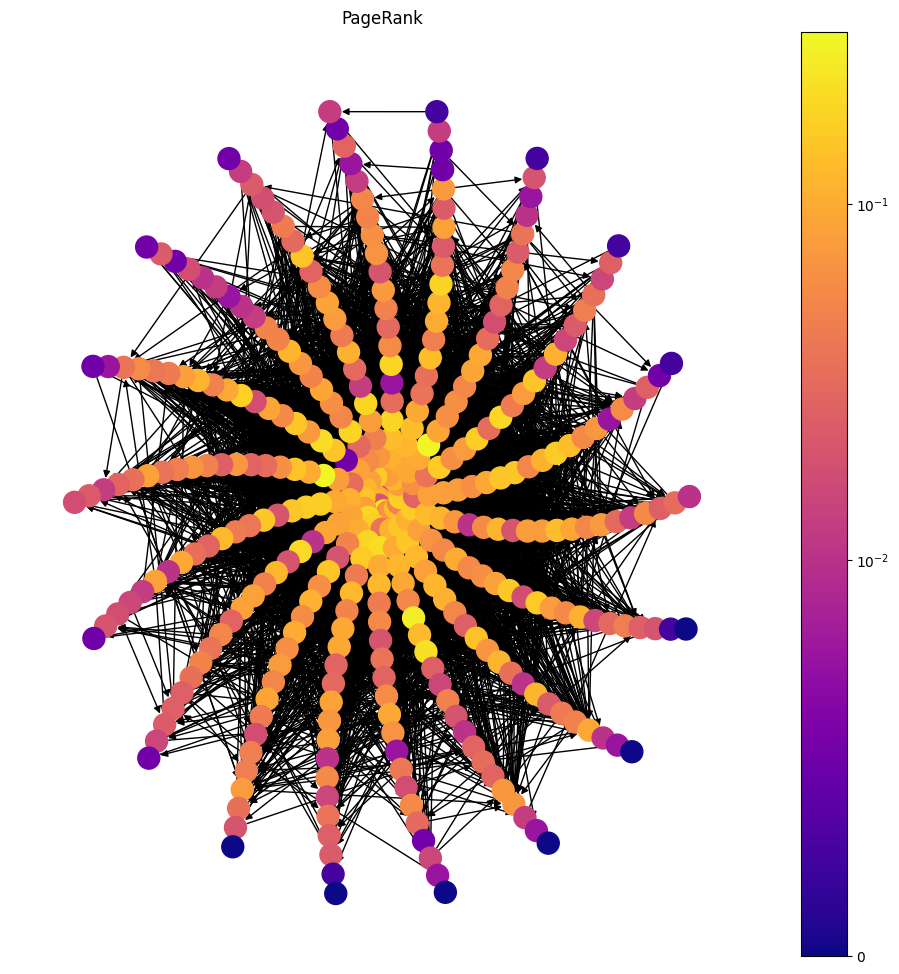

In [110]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{4397: Text(-0.1608715839238275, 0.0729031168798152, '4397'),
 1565: Text(0.35870543788881587, 0.2796574024635873, '1565'),
 3252: Text(0.42851571551769746, 0.34127838345375766, '3252'),
 3921: Text(0.2743611582906734, 0.42485409547745706, '3921'),
 940: Text(0.19143464908756275, 0.2428965632504257, '940')}

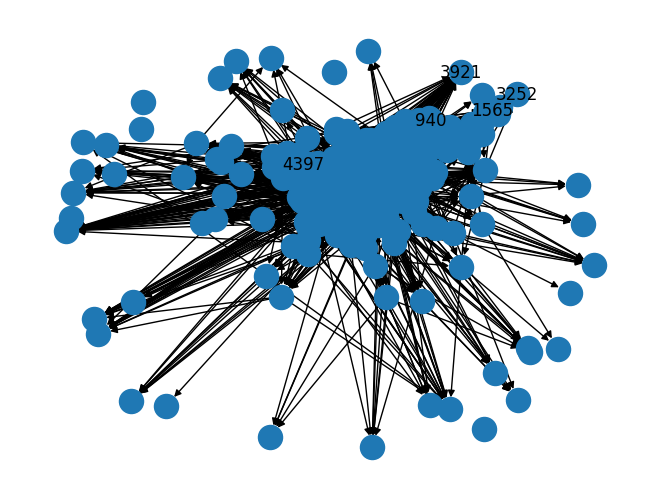

In [23]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

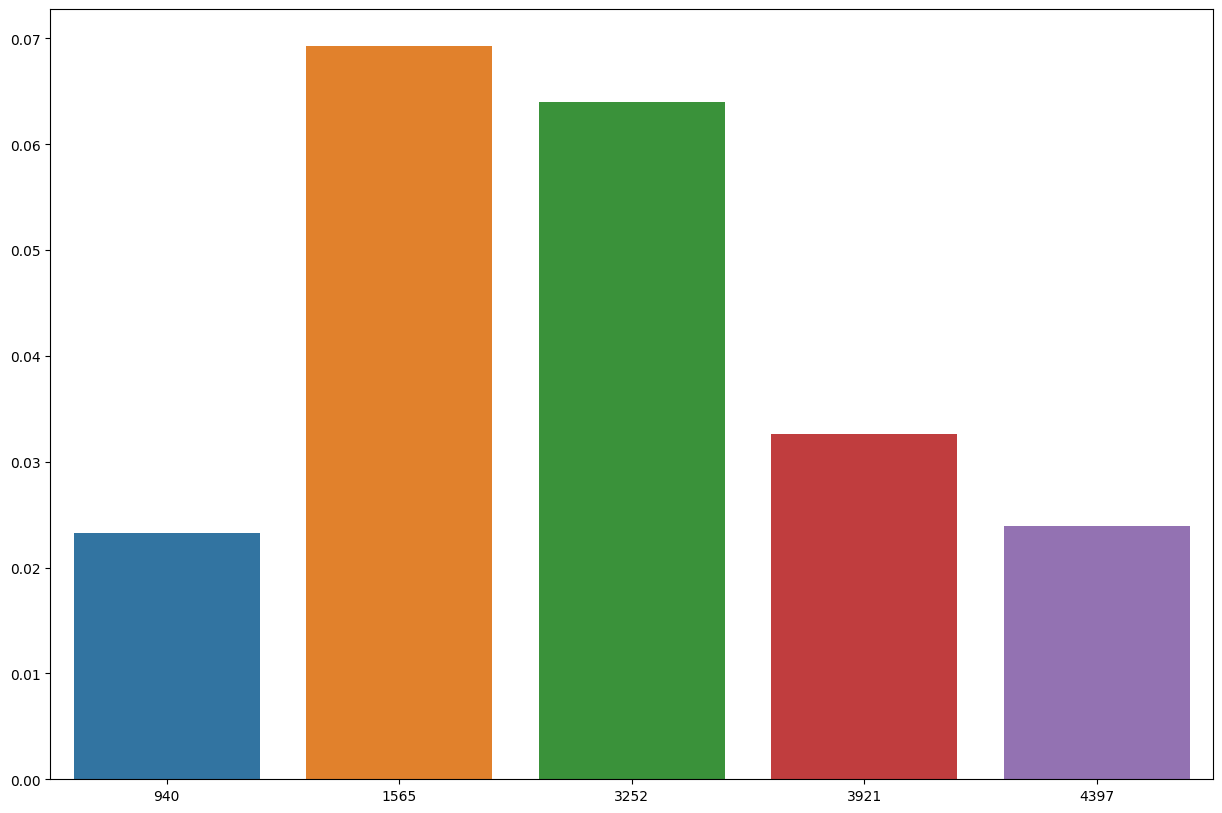

In [126]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in pager.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

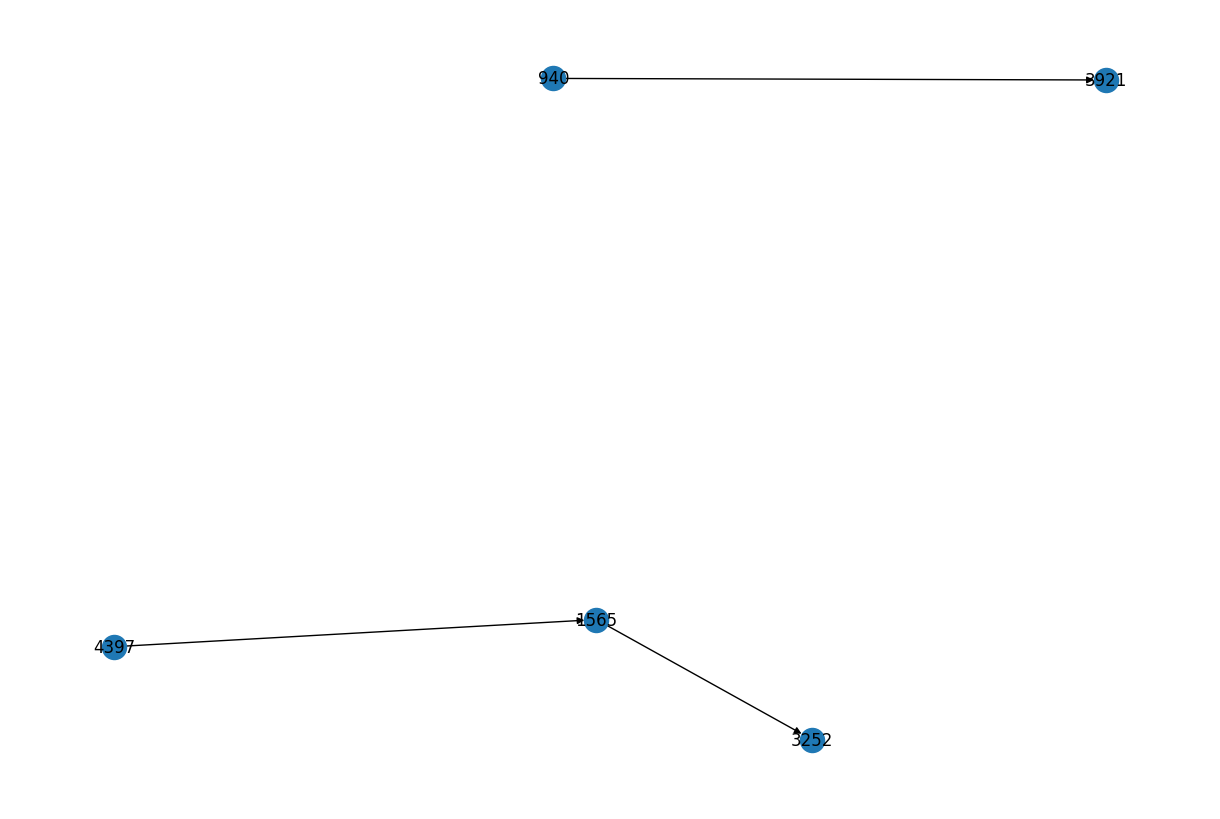

In [24]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_pager = nx.DiGraph()
graph_pager.add_edges_from(edges)
graph_pager.add_nodes_from(nodes)
pos_pager = nx.spring_layout(graph_pager)

plt.figure(figsize=(12,8))
nx.draw(graph_pager, pos_pager, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_pager, pos_pager, labels)
plt.show()

### Analisi delle strutture

Communites

In [25]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({5,
            12,
            31,
            40,
            43,
            68,
            81,
            88,
            98,
            107,
            109,
            111,
            116,
            123,
            159,
            182,
            203,
            402,
            408,
            419,
            427,
            434,
            527,
            536,
            560,
            570,
            588,
            599,
            623,
            636,
            656,
            659,
            670,
            736,
            809,
            827,
            837,
            904,
            913,
            926,
            993,
            1002,
            1026,
            1089,
            1143,
            1217,
            1294,
            1297,
            1357,
            1376,
            1386,
            1397,
            1438,
            1444,
            1455,
            1476,
            1486,
            1491,
       

In [26]:
len(communities)

9

In [27]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos)

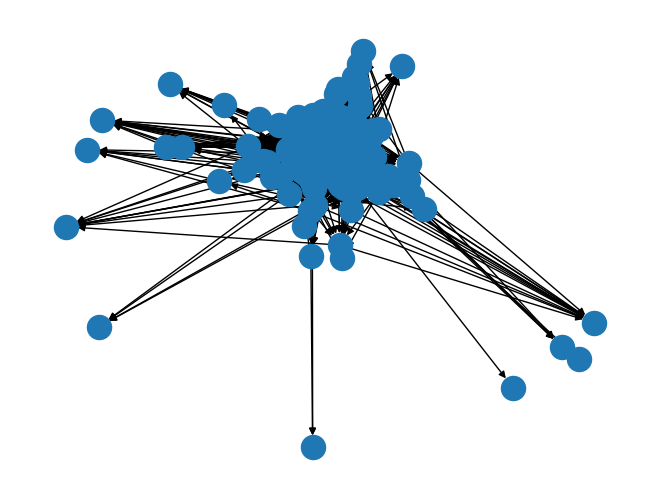

In [28]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[0])
graph_comm1 = grafo(communities[0], edges)
visualizza(graph_comm1)

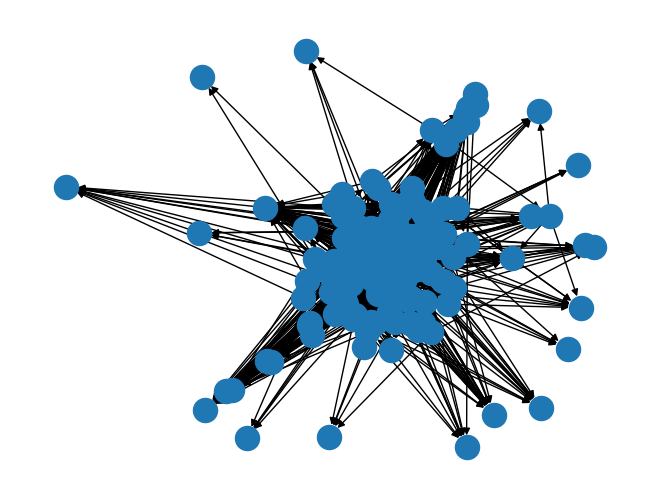

In [29]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[1])
graph_comm2 = grafo(communities[1], edges)
visualizza(graph_comm2)

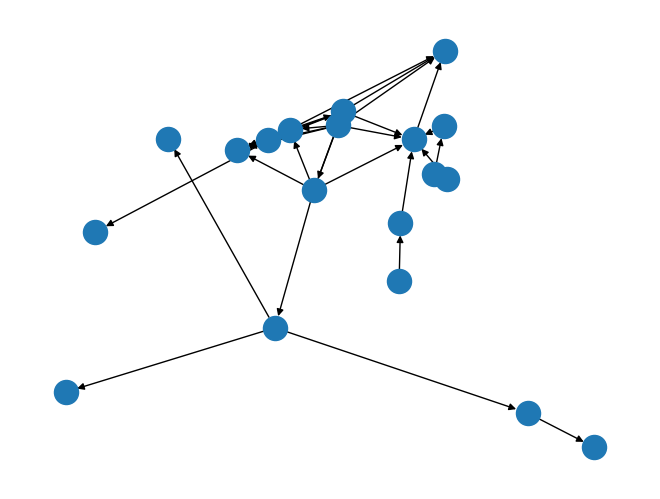

In [30]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[2])
graph_comm3 = grafo(communities[2], edges)
visualizza(graph_comm3)